In [1]:
import pandas as pd

# regression with scikit learn using all state severity data

## import the data using pandas

so the problem stated in kaggle wanted the mean absolute error (MAE) between the predicted loss and the actual loss.
for a better model we should calculate RMSE (ROOT MEAN SQUARE ERROR) WHICH IS BETTER THAN MAE.
Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable.

In [2]:
sample = pd.read_csv('./allstate/sample_submission.csv', sep=',')
print(type(sample))
sample.head(15)

<class 'pandas.core.frame.DataFrame'>


,id,loss
0,4,0
1,6,0
2,9,0
3,12,0
4,15,0
5,17,0
6,21,0
7,28,0
8,32,0
9,43,0


In [3]:
train = pd.read_csv('./allstate/train.csv', sep=',')
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
test = pd.read_csv('./allstate/test.csv', sep=',')
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


exploring and analyzing the data to get started 

In [5]:
sample.isnull().any()

id      False
loss    False
dtype: bool

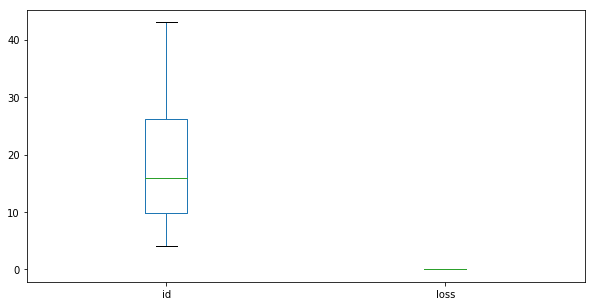

In [20]:
sample[:10].plot(kind='box', figsize=(10,5))

## importing libraries to perform regression analysis 

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [29]:
train.shape

(188318, 132)

In [30]:
train.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

## Declare the Columns You Want to Use as Features

In [64]:
features = ['id', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14']

## Specify the Prediction Target

In [65]:
target = ['loss']

## Clean the Data

In [66]:
train = train.dropna()


## Extract Features and Target ('loss') Values into Separate Dataframes

In [67]:
X = train[features]

In [68]:
y = train[target]

In [69]:
X.iloc[2]

id        5.000000
cont6     0.289648
cont7     0.315545
cont8     0.273200
cont9     0.260760
cont10    0.324460
cont11    0.381398
cont12    0.373424
cont13    0.195709
cont14    0.774425
Name: 2, dtype: float64

In [70]:
y

,loss
0,2213.18
1,1283.60
2,3005.09
3,939.85
4,2763.85
5,5142.87
6,1132.22
7,3585.75
8,10280.20
9,6184.59


## Perform Prediction using Linear Regression Model

In [83]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
regressor = LinearRegression()
regressor.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[3023.91922454],
       [2673.52169189],
       [2547.0610568 ],
       ...,
       [3184.79897053],
       [2533.54822044],
       [2764.09699464]])

In [86]:
y_test.describe()

,loss
count,62145.000000
mean,3037.324905
std,2899.541902
min,8.400000
25%,1208.130000
50%,2124.650000
75%,3845.670000
max,85923.560000


## Evaluate Linear Regression Accuracy using Root Mean Square Error

In [87]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [88]:
print(RMSE)

2868.8891497085724


## (2) Decision Tree Regressor: Fit a new regression model to the training set

In [89]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## Perform Prediction using Decision Tree Regressor

In [90]:
y_prediction = regressor.predict(X_test)
y_prediction

array([3117.19749386, 2098.46827586, 3369.93031746, ..., 2045.80958333,
        367.46      , 3265.31708333])

## For comparision: What is the mean of the expected target value in test set ?

In [91]:
y_test.describe()

,loss
count,62145.000000
mean,3037.324905
std,2899.541902
min,8.400000
25%,1208.130000
50%,2124.650000
75%,3845.670000
max,85923.560000


## Evaluate Decision Tree Regression Accuracy using Root Mean Square Error

In [92]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [93]:
print(RMSE)

3572.301891902001
